### DSC 550 Project: Housing Price Prediction

Abhijit Mandal

###  Description: 

The objective of this project is to build a Machine Learning model for the prediction of housing prices based on pattern extracted from our USA_Housing dataset which contains data about USA housing sales provided by Kaggle. This dataset contains features like number of bedrooms, number of bathrooms, sqft, year built, year renovated, condition, zipcode and the target variable will be price. We will use various visualization methods to analyze the correlation of each feature as part of EDA. Descriptive analysis and quantitative analysis will use subsets of it depending on models. This project consists of two phases:
- Phase I: Focuses on data cleaning, exploration and preprocessing.
- Phase II : Machine Learning model building, validation and prediction.

### SalePrice - This is the target variable/dependent variable that I am trying to predict.

- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: dollar Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [465]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [466]:

from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test
df = pd.read_csv('train.csv')
train, test = train_test_split(df, test_size=0.2)

#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
274,275,20,RL,76.0,8314,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1982,1982,Gable,CompShg,HdBoard,ImStucc,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,546,Unf,0,270,816,GasA,TA,Y,SBrkr,816,0,0,816,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1982.0,Unf,1,264,TA,TA,Y,168,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,124500
1097,1098,120,RL,NaN,3696,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1986,1986,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1074,1074,GasA,Ex,Y,SBrkr,1088,0,0,1088,0,0,1,1,2,1,Gd,5,Typ,0,NaN,Attchd,1987.0,RFn,2,461,TA,TA,Y,0,74,137,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,170000
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,905,Unf,0,357,1262,GasA,Gd,Y,SBrkr,1262,0,0,1262,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2006.0,Fin,2,572,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
623,624,160,FV,NaN,2117,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,513.0,Gd,TA,PConc,Gd,TA,No,GLQ,420,Unf,0,336,756,GasA,Ex,Y,SBrkr,756,756,0,1512,0,0,2,1,2,1,Gd,4,Typ,1,TA,Detchd,2000.0,Unf,2,440,TA,TA,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,168500
1020,1021,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,1024,Unf,0,108,1132,GasA,Ex,Y,SBrkr,1132,0,0,1132,1,0,1,1,2,1,Gd,5,Typ,0,NaN,Attchd,2005.0,Fin,2,451,TA,TA,Y,252,64,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,176000


In [467]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1058,1059,60,RL,96.0,11308,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,154.0,Ex,TA,PConc,Ex,TA,Av,GLQ,936,Unf,0,168,1104,GasA,Ex,Y,SBrkr,1130,1054,0,2184,1,0,2,1,3,1,Ex,10,Typ,1,Gd,Attchd,2008.0,Fin,3,836,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,335000
1159,1160,60,RL,76.0,9120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,6,1974,1974,Hip,CompShg,HdBoard,HdBoard,BrkFace,270.0,Gd,TA,CBlock,TA,TA,No,ALQ,442,Unf,0,459,901,GasA,TA,Y,SBrkr,943,933,0,1876,0,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1974.0,RFn,2,540,Gd,TA,Y,0,69,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,185000
1367,1368,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,5,6,1977,1977,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,548,Rec,173,36,757,GasA,Ex,Y,SBrkr,925,550,0,1475,0,0,2,0,4,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,1,336,TA,TA,Y,104,26,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,127000
1215,1216,20,RL,99.0,7094,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,180,LwQ,374,340,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1966.0,RFn,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2007,WD,Normal,125000
1181,1182,120,RM,64.0,5587,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2008,2008,Hip,CompShg,CemntBd,CmentBd,Stone,186.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1480,Unf,0,120,1600,GasA,Ex,Y,SBrkr,1652,0,0,1652,1,1,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2008.0,Fin,2,482,TA,TA,Y,162,53,0,153,0,0,NaN,NaN,NaN,0,11,2008,New,Partial,392500


In [468]:
# Let's look at the number of rows and columns in the dataset
print(train.shape)
print(test.shape)

(1168, 81)
(292, 81)


As we can see that in train there are 1460 rows with 81 columns  and in test dataset 1459 rows with 80 columns. our dependent variable is 'SalePrice'

In [469]:
# Getting insights of the features and outliers
train.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,960.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1096.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,733.869863,57.940925,69.687500,10490.509418,6.080479,5.555651,1971.138699,1984.961473,99.197414,435.914384,45.791096,564.410959,1046.116438,1153.045377,349.570205,6.498288,1509.11387,0.422089,0.055651,1.560788,0.383562,2.857877,1.045377,6.492295,0.597603,1978.691606,1.759418,470.592466,93.765411,45.940925,21.488014,3.240582,15.599315,2.955479,47.640411,6.325342,2007.818493,178842.428938
std,419.076052,43.169947,24.498691,9960.965458,1.373153,1.123246,30.469189,20.597070,174.007051,459.474305,157.438752,443.749631,442.020699,387.940062,433.055979,50.575929,522.34831,0.521114,0.233050,0.550519,0.502065,0.822982,0.220218,1.665706,0.633858,24.819380,0.756235,217.878900,125.997422,67.243606,60.830864,28.905416,56.221258,41.648504,546.848346,2.711234,1.332965,76875.948886
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,374.500000,20.000000,59.000000,7559.500000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,784.000000,874.000000,0.000000,0.000000,1124.75000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,319.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,733.500000,50.000000,69.000000,9458.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,368.500000,0.000000,475.000000,980.500000,1072.000000,0.000000,0.000000,1464.00000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161500.000000
75%,1090.500000,70.000000,80.000000,11483.500000,7.000000,6.000000,2000.000000,2004.000000,163.250000,712.250000,0.000000,806.000000,1272.250000,1370.500000,728.000000,0.000000,1768.75000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213310.000000
99%,1444.660000,190.000000,140.410000,41910.980000,9.330000,9.000000,2009.000000,2009.000000,766.820000,1568.650000,800.570000,1796.650000,2154.650000,2210.300000,1399.260000,367.920000,3012.32000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1021.650000,504.980000,291.330000,264.000000,171.960000,265.640000,0.000000,733.000000,12.000000,2010.000000,432360.820000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,2065.000000,528.000000,5642.00000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,745

In [470]:
# Summary of the training dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 274 to 1233
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    960 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          72 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overal

In [471]:
#Checking percentage of null values present in training dataset 
missing_num= train[train.columns].isna().sum().sort_values(ascending=False)
missing_perc= (train[train.columns].isna().sum()/len(train)*100).sort_values(ascending=False)
missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
missing_train= missing[missing['Percentage']>0]
missing_train

,Total,Percentage
PoolQC,1162,99.486301
MiscFeature,1123,96.147260
Alley,1096,93.835616
Fence,942,80.650685
FireplaceQu,561,48.030822
LotFrontage,208,17.808219
GarageCond,72,6.164384
GarageType,72,6.164384
GarageYrBlt,72,6.164384
GarageFinish,72,6.164384


In [472]:
#Checking percentage of null values present in testing dataset 
missing_num= test[test.columns].isna().sum().sort_values(ascending=False)
missing_perc= (test[test.columns].isna().sum()/len(test)*100).sort_values(ascending=False)
missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
missing_test= missing[missing['Percentage']>0]
missing_test

,Total,Percentage
PoolQC,291,99.657534
MiscFeature,283,96.917808
Alley,273,93.493151
Fence,237,81.164384
FireplaceQu,129,44.178082
LotFrontage,51,17.465753
GarageType,9,3.082192
GarageQual,9,3.082192
GarageCond,9,3.082192
GarageYrBlt,9,3.082192


19 attributes have missing values and 5 features( PoolQC,MiscFeature,Alley,Fence,FireplaceQu) have missing percentage greater than 45%

### Step 2. Data Visualisation


Understanding the distribution of various numeric variables
We will identify if some predictors directly have a strong association with the outcome variable
There are 1460 instances of training data and 1459 of test data. Total number of attributes equals 81 in train data and 80 in <b>test data excluding SalePrice</b>, of which 36 is quantitative, 43 categorical + Id and SalePrice.

`Numerical features`: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

`Categorical features`: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

In [473]:
numerical = train.select_dtypes(include=['int64','float64']).drop(['SalePrice','Id'],axis=1)
numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
274,20,76.0,8314,5,7,1982,1982,0.0,546,0,270,816,816,0,0,816,0,0,1,0,2,1,5,0,1982.0,1,264,168,0,0,0,0,0,0,6,2007
1097,120,NaN,3696,8,5,1986,1986,0.0,0,0,1074,1074,1088,0,0,1088,0,0,1,1,2,1,5,0,1987.0,2,461,0,74,137,0,0,0,0,10,2007
281,20,60.0,7200,6,5,2006,2006,68.0,905,0,357,1262,1262,0,0,1262,0,0,2,0,2,1,5,0,2006.0,2,572,0,120,0,0,0,0,0,5,2006
623,160,NaN,2117,6,5,2000,2000,513.0,420,0,336,756,756,756,0,1512,0,0,2,1,2,1,4,1,2000.0,2,440,0,32,0,0,0,0,0,6,2007
1020,20,60.0,7024,4,5,2005,2005,0.0,1024,0,108,1132,1132,0,0,1132,1,0,1,1,2,1,5,0,2005.0,2,451,252,64,0,0,0,0,0,6,2008


In [474]:
categorical = train.select_dtypes(exclude=['int64','float64'])
categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
274,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,ImStucc,None,TA,TA,CBlock,TA,TA,Gd,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1097,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
281,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
623,FV,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1020,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [475]:
# Function to show values on bar plot
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=0.9) 

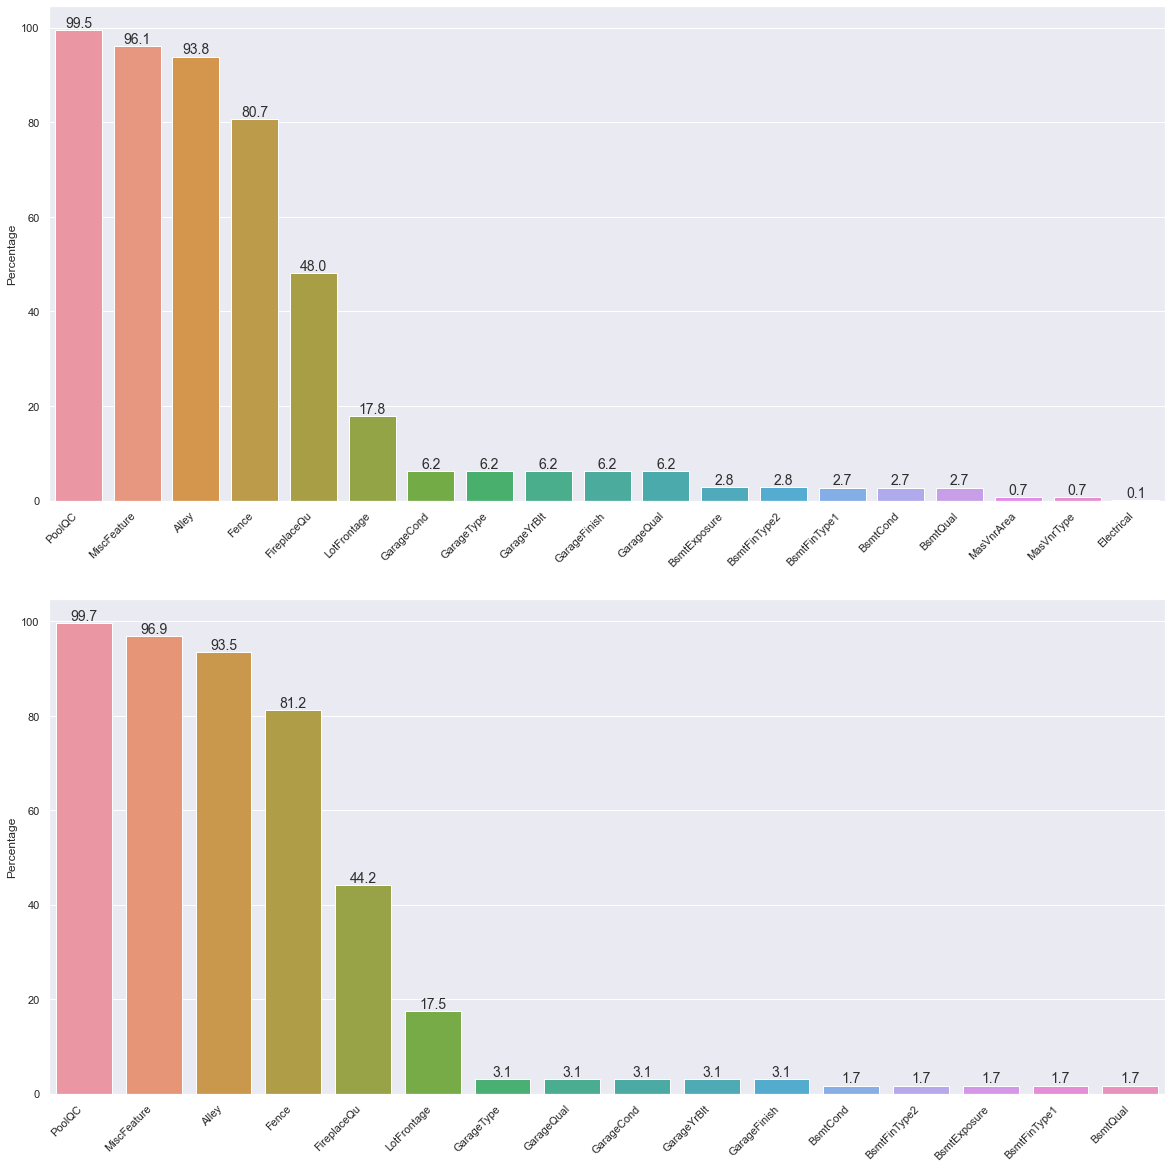

In [476]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
ax1=sns.barplot(x=missing_train.index,y='Percentage',data=missing_train)
showvalues(ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.subplot(2,1,2)
ax2=sns.barplot(x=missing_test.index,y='Percentage',data=missing_test)
showvalues(ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [477]:
# Dropping Id column from train and test test
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
print(train.shape)
print(test.shape)

(1168, 80)
(292, 80)


In [478]:
len(train.select_dtypes(include=['int64','float64']).columns)

37

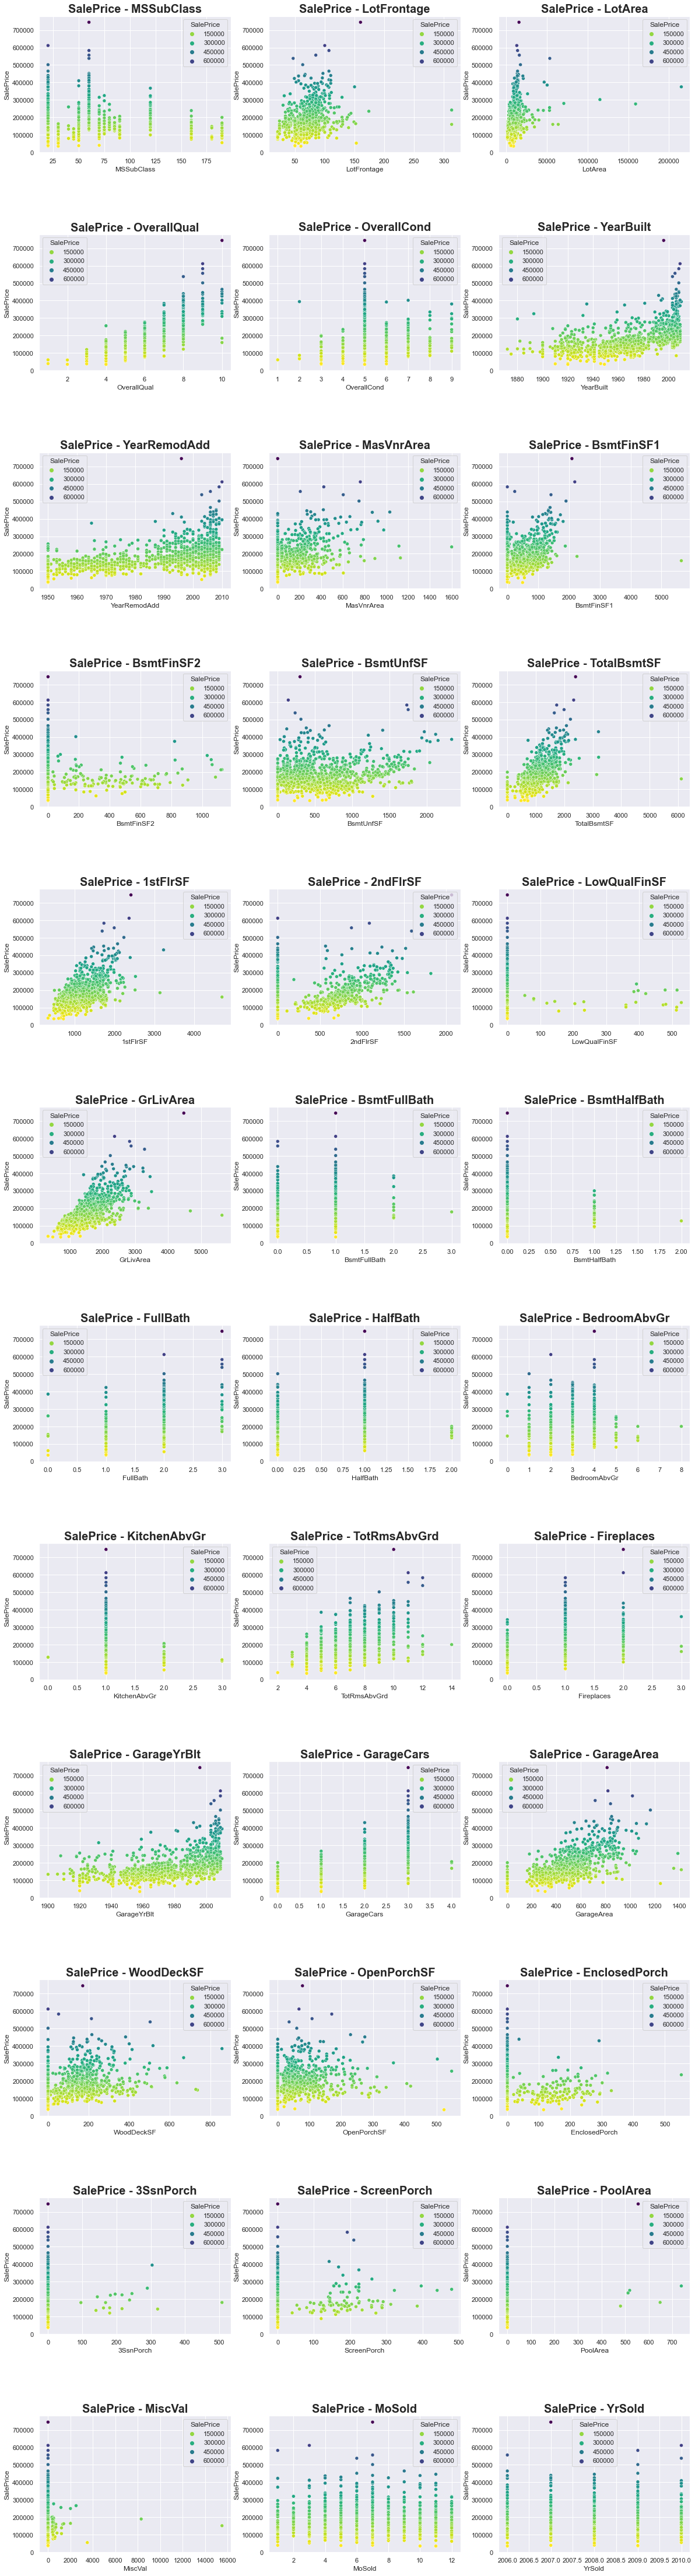

In [479]:
#Visualising numerical predictor variables with Target Variables
train_num = train.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
#adjust horizontal space between plots 
fig.subplots_adjust(hspace=0.6)
for i,ax in zip(train_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=train_num,ax=ax,palette='viridis_r')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    #ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),fontweight='bold',size=20)

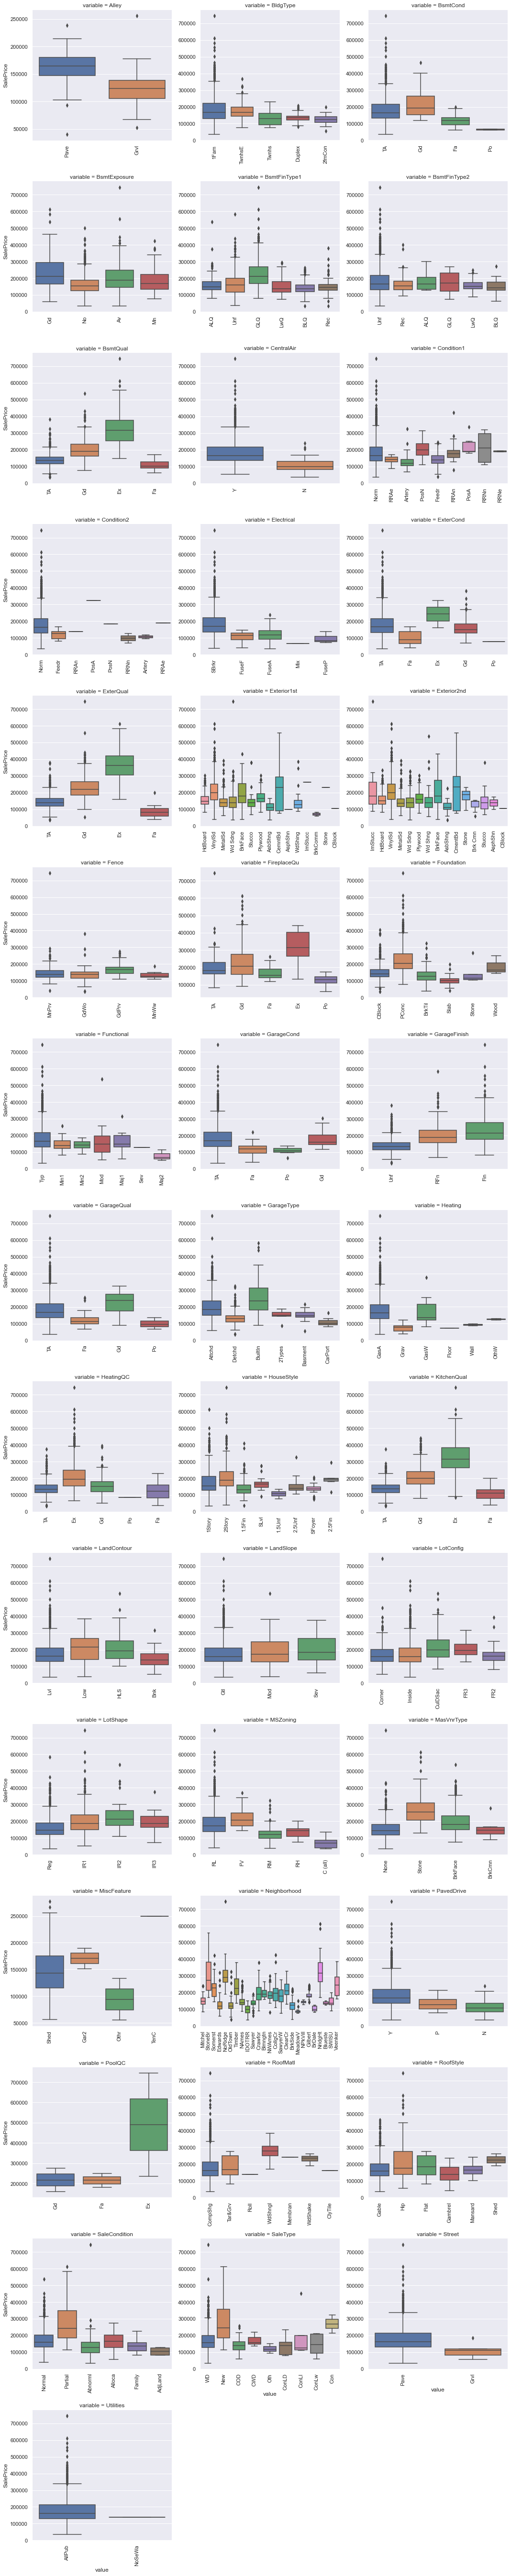

In [480]:
##Visualising Categorical predictor variables with Target Variables
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    

f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(train[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

few observation from boxplots,As we can see,SalePrice for fullbath=3 is higher than 0,1, or 2. SalePrice for OverallQal=10 which is very excellent is higher than others.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

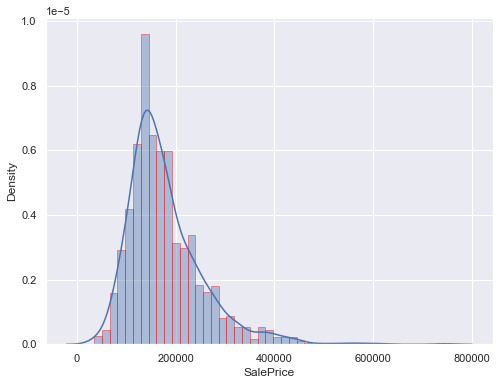

In [481]:
# Distribution of Target variable (SalePrice)
plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice'],hist_kws={"edgecolor": (1,0,0,1)})

In [482]:
# Skew and kurtosis for SalePrice 
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.731248
Kurtosis: 5.528186


<AxesSubplot:>

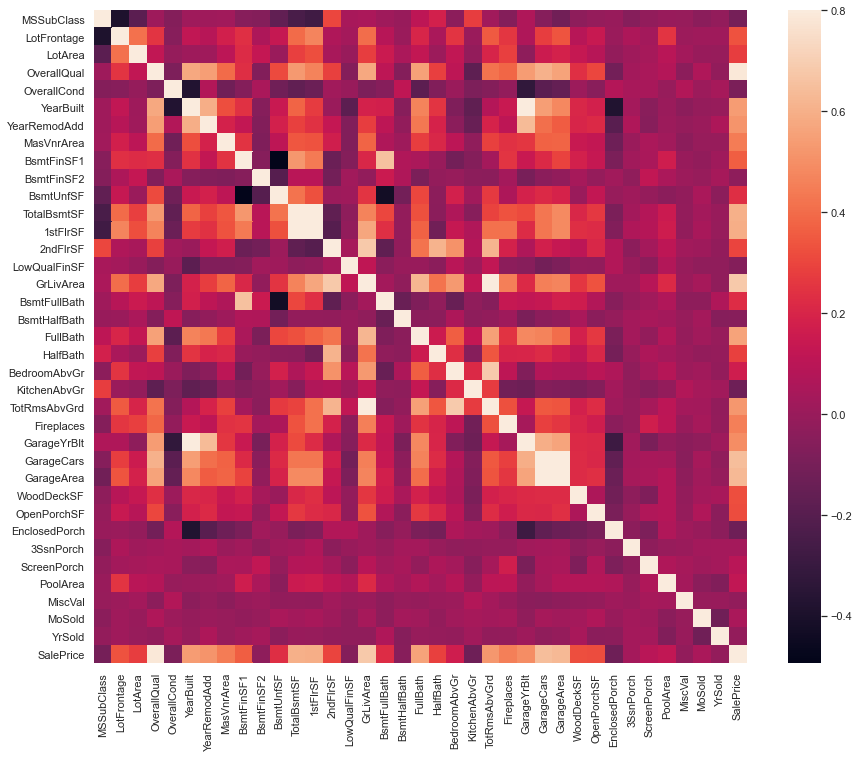

In [483]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

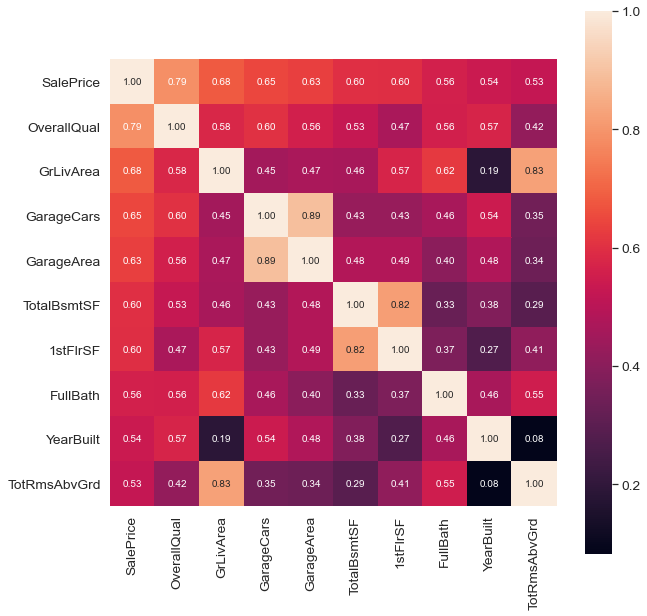

In [484]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Log transformation is used to transform skewed data to approximately conform to normality.

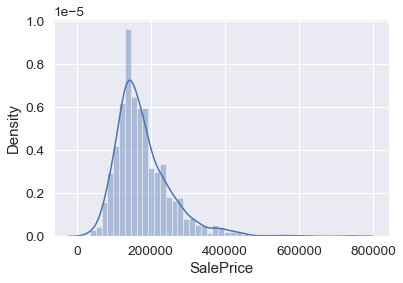

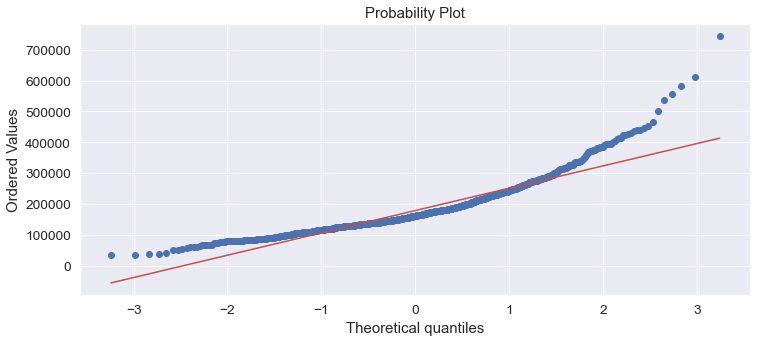

In [485]:
#before log transformation
sns.distplot(train['SalePrice']);
fig_saleprice = plt.figure(figsize=(12,5))
result1 = stats.probplot(train['SalePrice'],plot = plt)

In [486]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

In [487]:
train['SalePrice']

274     11.732061
1097    12.043554
281     12.128111
623     12.034691
1020    12.078239
          ...    
974     12.028739
723     11.813030
1186    11.461632
1278    12.375815
1233    11.863582
Name: SalePrice, Length: 1168, dtype: float64

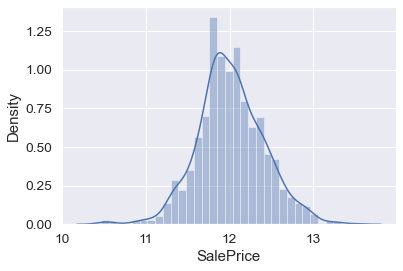

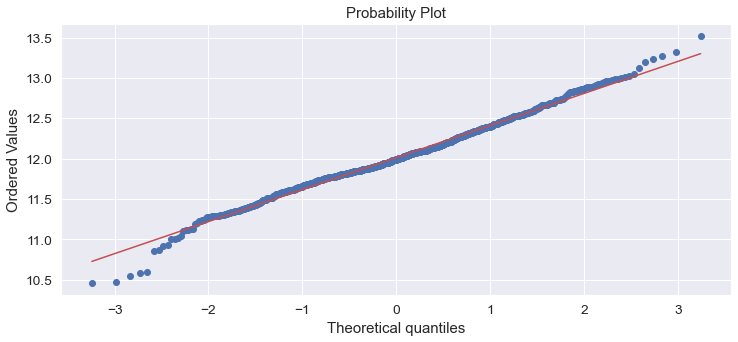

In [488]:
#after log transformation
sns.distplot(train['SalePrice']);
fig_saleprice2 = plt.figure(figsize=(12,5))
result3 = stats.probplot(train['SalePrice'],plot = plt)

below code is used to see top 10 highly correlated columns with saleprice in which OverallQual,GrLiveArea,Garagecars,GarageArea,TotalBsmtSF and 1stFlrSF are highly correlated

In [489]:
#below code is used to see which column is more correlated to dependent varibale so first ten columns are more correlated compare to other columns
corr = train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.810724
GarageCars       0.682828
GrLivArea        0.681504
GarageArea       0.652546
TotalBsmtSF      0.600651
FullBath         0.596175
YearBuilt        0.588041
1stFlrSF         0.587920
YearRemodAdd     0.566573
GarageYrBlt      0.541034
TotRmsAbvGrd     0.524884
Fireplaces       0.475378
MasVnrArea       0.411219
BsmtFinSF1       0.351870
LotFrontage      0.342000
WoodDeckSF       0.329368
HalfBath         0.316273
OpenPorchSF      0.311881
2ndFlrSF         0.302430
LotArea          0.266796
BsmtUnfSF        0.237257
BsmtFullBath     0.233309
BedroomAbvGr     0.212841
ScreenPorch      0.109279
PoolArea         0.085548
MoSold           0.050512
3SsnPorch        0.046019
BsmtFinSF2      -0.009260
MiscVal         -0.020551
YrSold          -0.021256
BsmtHalfBath    -0.028924
OverallCond     -0.039423
LowQualFinSF    -0.060595
MSSubClass      -0.093579
KitchenAbvGr    -0.131685
EnclosedPorch   -0.144427
Name: SalePrice, dtype: float64

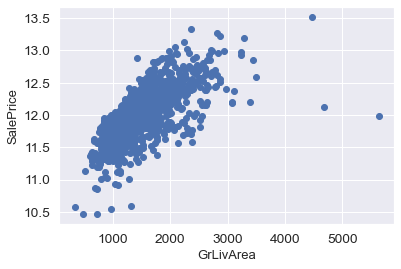

In [490]:
# Outliers

#we are going to plot first 10 highly correlated columns to see how many outliers we have in our dataset

fig = plt.subplots()
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

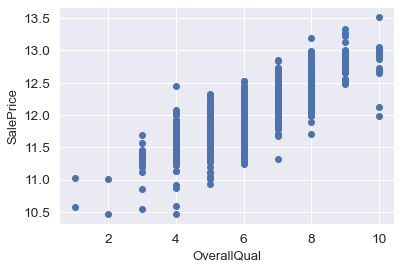

In [491]:
fig1= plt.subplots()
plt.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

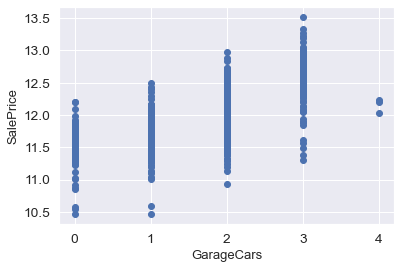

In [492]:
fig2= plt.subplots()
plt.scatter(x = train['GarageCars'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()


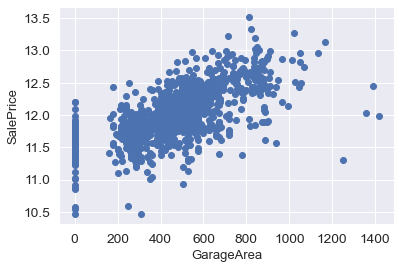

In [493]:
fig3= plt.subplots()
plt.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

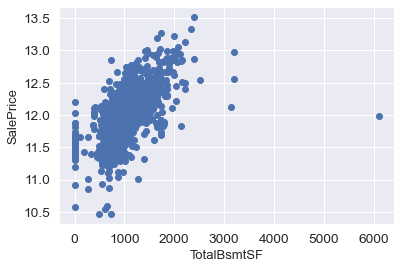

In [494]:
fig4= plt.subplots()
plt.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

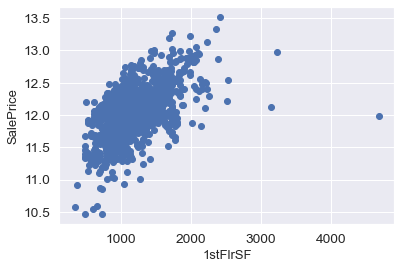

In [495]:
fig5= plt.subplots()
plt.scatter(x = train['1stFlrSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

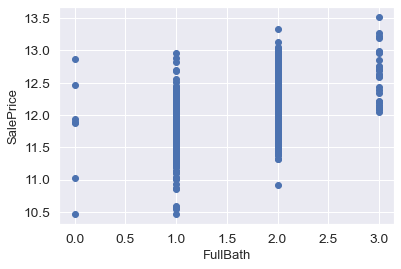

In [496]:
fig6= plt.subplots()
plt.scatter(x = train['FullBath'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('FullBath', fontsize=13)
plt.show()

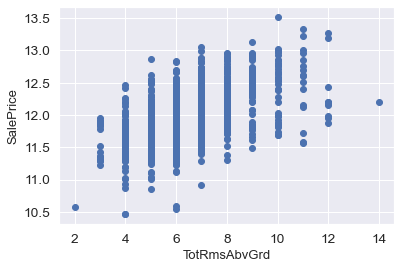

In [497]:
fig7= plt.subplots()
plt.scatter(x = train['TotRmsAbvGrd'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotRmsAbvGrd', fontsize=13)
plt.show()

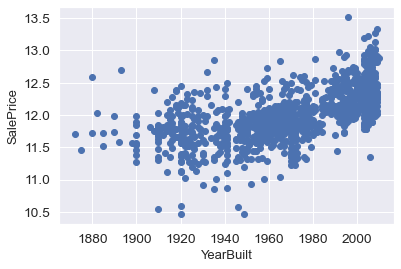

In [498]:
fig8= plt.subplots()
plt.scatter(x = train['YearBuilt'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

In [499]:
#deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<500000)].index)
train = train.drop(train[(train['TotalBsmtSF']>3000) & (train['SalePrice']<700000)].index)
train = train.drop(train[(train['1stFlrSF']>2700) & (train['1stFlrSF']<700000)].index)

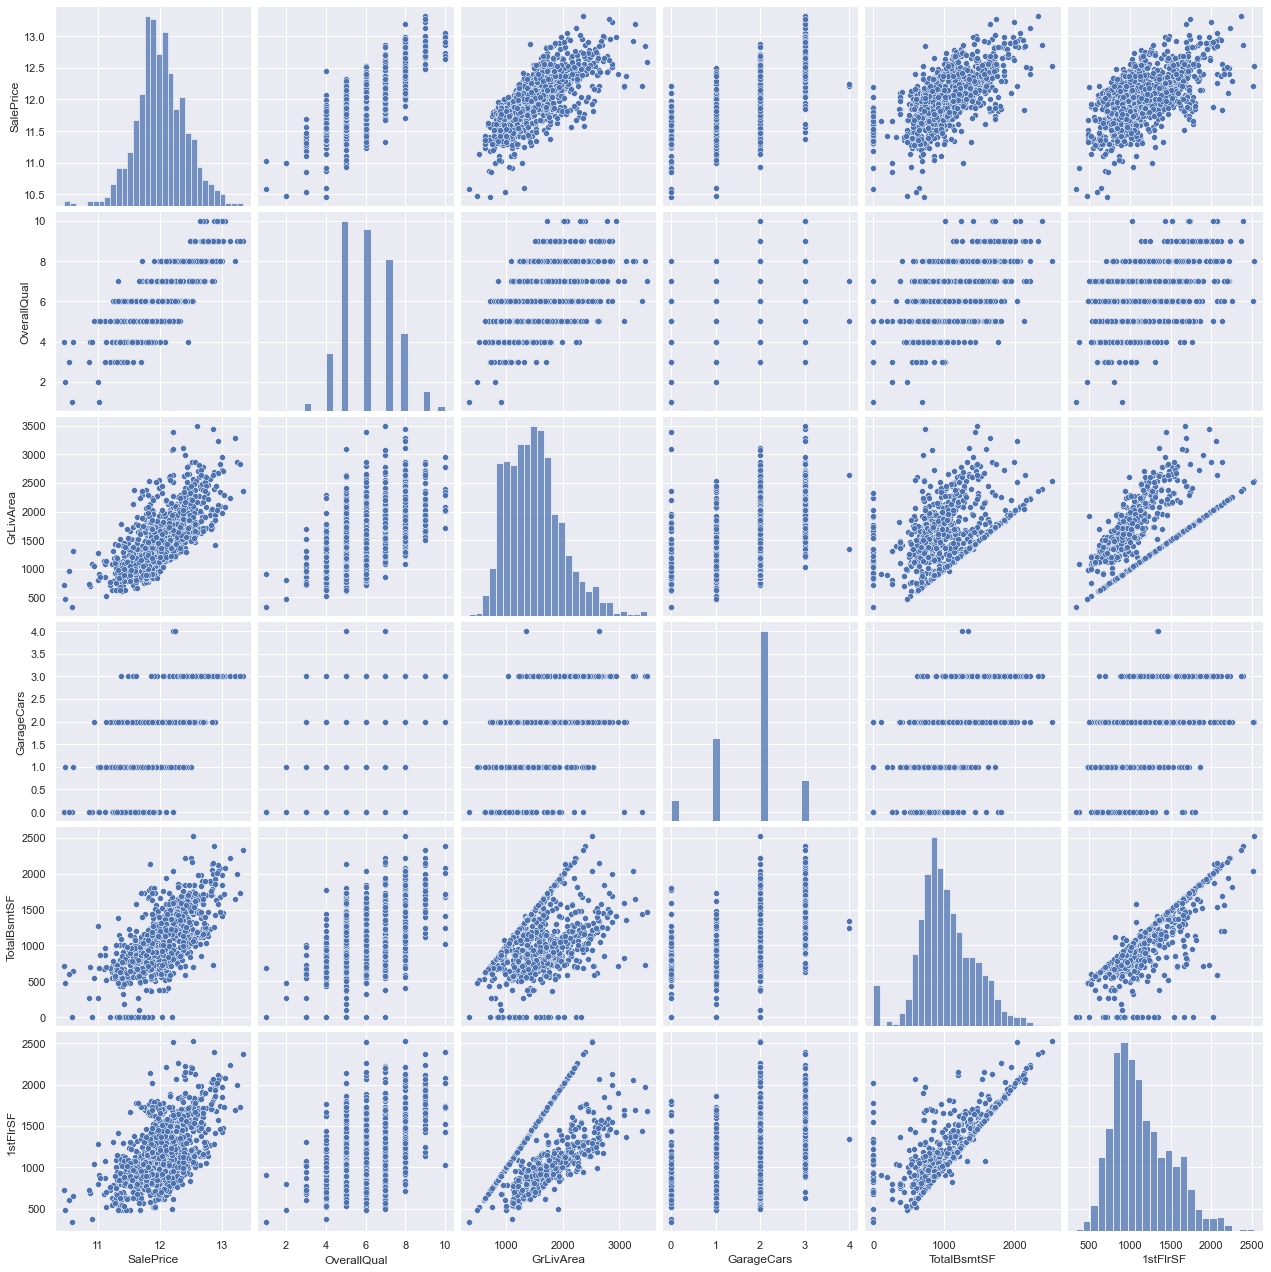

In [500]:
#scatterplot
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(train[columns], size = 3)
plt.show();

### Milestone 2 Data Preparation
Here is a list of steps to consider performing in Milestone 2:
Drop any features that are not useful for your model building and explain why they are not useful.
Perform any data extraction/selection steps.
Transform features if necessary.
Engineer new useful features.
Deal with missing data (do not just drop rows or columns without justifying this).
Create dummy variables if necessary.
Explain your process at each step. You can use any methods/tools you think are most appropriate. Do what makes the most sense for your data/problem. This will vary greatly among different projects. Be careful to avoid data snooping in these steps.


In [501]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [502]:
# Treating Outliers

## Deleting those two values with outliers. 
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

In [503]:
# Merging train and test data to do handle missing values in both train and test data, 
# handling datatype issues, skewness and transformation
y=train['SalePrice']
test_data = test['SalePrice']
train_df=train.drop('SalePrice',axis=1)
#train_df=train
test_df = test.drop('SalePrice',axis=1)
df_all= pd.concat([train_df,test_df]).reset_index(drop=True)

In [504]:
df_all['age']=df_all['YrSold']-df_all['YearBuilt']
# Some of the non-numeric predictors are stored as numbers; convert them into strings 
#will convert those columns into dummy variables later.
df_all[['MSSubClass']] = df_all[['MSSubClass']].astype(str) 
df_all['YrSold'] = df_all['YrSold'].astype(str) #year
df_all['MoSold'] = df_all['MoSold'].astype(str) #month

In [505]:
# Handling Missing Values for 19 features which have missing values mentioned above

#Functional: Home functionality (Assume typical unless deductions are warranted)
df_all['Functional'] = df_all['Functional'].fillna('Typ')
df_all['Electrical'] = df_all['Electrical'].fillna('SBrkr') #Filling with modef

# data description states that NA refers to "No Pool"
df_all["PoolQC"] = df_all["PoolQC"].fillna("None")

# Replacing the missing values with 0, since no garage = no cars in garage inferred from data dictionary
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)
df_all['KitchenQual'] = df_all['KitchenQual'].fillna("TA")
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

# Replacing the missing values with None inferred from data dictionary 
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_all[col] = df_all[col].fillna('None')


# Replacing the missing values with None 
# NaN values for these categorical basement df_all, means there's no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_all[col] = df_all[col].fillna('None')

#Replacing missing value it with median beacuse of outliers
df_all['LotFrontage'] = df_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Replacing the missing values with None 
# We have no particular intuition around how to fill in the rest of the categorical df_all
# So we replace their missing values with None
objects = []
for i in df_all.columns:
    if df_all[i].dtype == object:
        objects.append(i)
df_all.update(df_all[objects].fillna('None'))

numeric_dtypes = [ 'int64','float64']
numerics = []
for i in df_all.columns:
    if df_all[i].dtype in numeric_dtypes:
        numerics.append(i)
df_all.update(df_all[numerics].fillna(0))

df_all['MSZoning'] = df_all.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [508]:
#Checking percentage of null values present in dataset 
missing_perc= (df_all[df_all.columns].isna().sum()/len(df_all)*100).sort_values(ascending=False)
print(missing_perc[missing_perc>0].sum()) #No missing values

0.0


### Handling Skewness in predictor variables
We will be removing Skewness from our model and predictor variables due to following reasons:

- For coefficients to be interpretable, linear regression assumes a bunch of things.
    - The errors our model commits should have the same variance and error terms should be normally distributed.
    - Following the linear regression assumptions is important if we want to either interpret the coefficients and can be used in business goals.
    - When the dependent variable is as skewed as our data is, the residuals usually will be too. Hence, we are handling skewness in our data.
    - This model will then be used to understand how exactly the prices vary with the variables`.

In [509]:
# We have already removed skewness from target variable (SalePrice) and made it normally distributed.
# Lets find out if numerical predictor variables are largely skewed or not
df_all_num = df_all.select_dtypes(include=['int64','float64'])
skew_features = df_all_num.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

MiscVal          24.413221
PoolArea         17.480260
LotArea          12.612515
3SsnPorch        10.264751
LowQualFinSF      8.976484
KitchenAbvGr      4.469701
BsmtFinSF2        4.261518
ScreenPorch       4.104812
BsmtHalfBath      4.086006
EnclosedPorch     3.088135
MasVnrArea        2.697828
OpenPorchSF       2.337252
WoodDeckSF        1.549088
LotFrontage       1.543436
GrLivArea         0.909151
BsmtUnfSF         0.905383
1stFlrSF          0.797376
2ndFlrSF          0.785042
BsmtFinSF1        0.748769
OverallCond       0.686695
HalfBath          0.679140
TotRmsAbvGrd      0.662572
Fireplaces        0.635226
age               0.605933
BsmtFullBath      0.595148
TotalBsmtSF       0.342984
BedroomAbvGr      0.214465
OverallQual       0.200142
GarageArea        0.017998
FullBath          0.017562
GarageCars       -0.359222
YearRemodAdd     -0.499890
YearBuilt        -0.610554
GarageYrBlt      -3.852956
dtype: float64

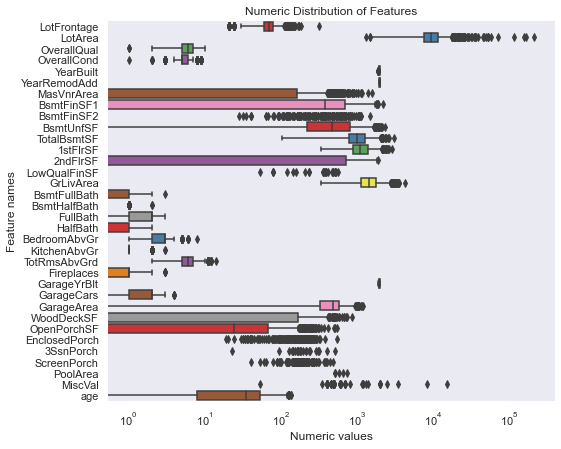

In [510]:
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_all_num , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)


In [511]:
# Normalize skewed features using a Box-Cox power transformation, we can use other techniques but am using boxpox
# as it works very well on this dataset
from scipy.special import boxcox1p
from scipy.stats import skew,boxcox_normmax
for i in skew_index:
    df_all[i] = boxcox1p(df_all[i], boxcox_normmax(df_all[i] + 1.002))

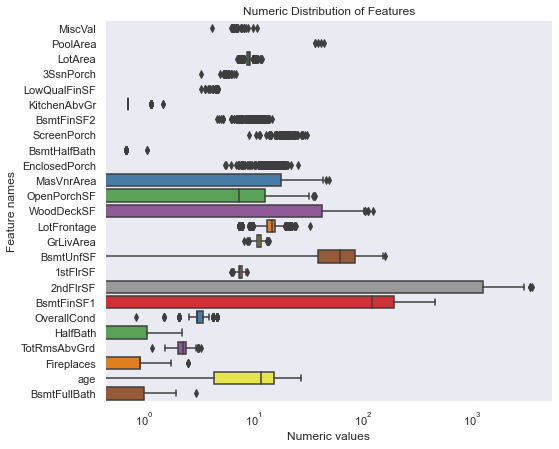

In [512]:
# Let's make sure we handled all the skewed values
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_all[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

### Features are looking normally distributed now, not much skewness in the distribution of predictor variables.

In [513]:
# Creating Derived features from raw attributes

#NOt useful columns in our predictions, more than 99% rows have same value.
print(df_all['Utilities'].value_counts())

#NOt useful columns in our predictions, more than 99% rows have same value.
print(df_all['Street'].value_counts())

#NOt useful columns in our predictions, more than 99% rows have same value.
print(df_all['PoolQC'].value_counts())

AllPub    1451
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1447
Grvl       5
Name: Street, dtype: int64
None    1447
Gd         2
Fa         2
Ex         1
Name: PoolQC, dtype: int64


In [514]:
df_all=df_all.drop(['Utilities', 'Street', 'PoolQC'], axis=1) # not useful df_all, evident from above
# vintage house with remodified version of it plays a important role in prediction(i.e. high price )
df_all['YrBltAndRemod']=df_all['YearBuilt']+df_all['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df_all['Total_sqr_footage'] = (df_all['BsmtFinSF1'] + df_all['BsmtFinSF2'] +
                                 df_all['1stFlrSF'] + df_all['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df_all['Total_Bathrooms'] = (df_all['FullBath'] + (0.5 * df_all['HalfBath']) +
                               df_all['BsmtFullBath'] + (0.5 * df_all['BsmtHalfBath']))
#Creating derived column for total porch area 
df_all['Total_porch_sf'] = (df_all['OpenPorchSF'] + df_all['3SsnPorch'] + df_all['EnclosedPorch'] + \
                              df_all['ScreenPorch'] + df_all['WoodDeckSF'])

In [515]:
df_all['has_pool'] = df_all['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_2ndfloor'] = df_all['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_garage'] = df_all['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_bsmt'] = df_all['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_fireplace'] = df_all['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_openporch'] =df_all['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_wooddeck'] =df_all['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_enclosedporch'] = df_all['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_3ssnporch']=df_all['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_openporch'] = df_all['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_screenporch'] = df_all['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)

In [516]:
#<-------------------------- Check Again ----------------------->
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
df_all['2ndFlrSF'] = df_all['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
df_all['LotFrontage'] = df_all['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
df_all['MasVnrArea'] = df_all['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

In [517]:
# Creating more derived feature by doing log transormation
def log_transform(result, features):
    m = result.shape[1]
    for feature in features:
        result = result.assign(newcol=pd.Series(np.log(1.01+result[feature])).values)   
        result.columns.values[m] = feature + '_log'
        m += 1
    return result

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd']

df_all = log_transform(df_all, log_features)

In [518]:
# Creating dummy variables for categorical and object variables

df_all_num= df_all.select_dtypes(include=['float64','int64']).columns  # Numerical columns
df_all_temp = df_all.select_dtypes(exclude=['float64','int64']) # selecting object and categorical features only
df_all_dummy= pd.get_dummies(df_all_temp)
df_all=pd.concat([df_all,df_all_dummy],axis=1) # joining converted dummy feature and original df_all dataset
df_all= df_all.drop(df_all_temp.columns,axis=1) #removing original categorical columns
df_all.shape

(1452, 366)

In [519]:
X= df_all[:len(train)] #converted into train data
Z_test= df_all[len(train):] #test data
print('Train Data Shape:',X.shape) #train set shape
print('Test Data Shape:',Z_test.shape)  #test set shape

Train Data Shape: (1160, 366)
Test Data Shape: (292, 366)


In [520]:
#based on describe method and scatter plot, removing outliers
outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']

def drop_outliers(x):
    list = []
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   
X = drop_outliers(X)
outliers = [30, 88, 462, 631]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])
print(X.shape)

(1156, 366)


For each feature, it counts the values of that feature. If the most recurrent value of the feature is repeated almost in all the instances (*zeros / len(X) * 100 > 99.94*). Then it drops these features because their values are almost the same for all instances and will not help in learning process and those features are not useful in our prediction.

In [521]:
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99.94:
            redundant.append(i)
    redundant = list(redundant)
    return redundant


redundant_features = redundant_feature(X)

X = X.drop(redundant_features, axis=1)
Z_test = Z_test.drop(redundant_features, axis=1)

In [522]:
print('Train Data Shape:',X.shape) #train set shape
print('Test Data Shape:',Z_test.shape)  #test set shape

Train Data Shape: (1156, 361)
Test Data Shape: (292, 361)


### Milestone 3
Build and evaluate at least one model. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are choosing the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for the context of your problem. If you are familiar with hyperparameter tuning, this would also be a great addition to your project. Again, keep in mind that this may look very different from what is done in the Titanic tutorial case study. You should do what makes sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.

### Milestone 4
Milestone 4 does not have any new requirements to the project but will give you some time to polish and refine your project in preparation for final submission. This is a great point in the project to solicit feedback and bounce final ideas off your instructor and peers. This will be your last opportunity to get feedback before your final project milestone/final submission is due.
If you peak ahead to Milestone 5, you will see that there will also be a conclusion/summary required with your final submission. Start thinking about this now – what does the analysis/model building tell you? What are your recommendations? How would you pitch this business problem to a group of stakeholders to gain buy-in to proceed? Why should someone in the business care about this solution?


In [523]:

#import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import r2_score
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)
from scipy.stats import skew,boxcox_normmax
from scipy.special import boxcox1p
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor

# will use the scores array to save results of different models we will apply and compare them
scores={}

# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(809, 361)
(809,)
(347, 361)
(347,)


In [524]:
# Applying kfold cross validation  to estimate the skill of our machine learning model on unseen data.

# We are using KFold() scikit-learn class can be used. It takes as arguments the number of splits,
# whether or not to shuffle the sample, and the seed for the pseudorandom number generator used prior to the shuffle.

kfold= KFold(n_splits=11,random_state=42,shuffle=True) 

In [525]:
# we need to check to see how well our model is performing on the test data. 
# For this, we evaluate our model by finding the root mean squared error produced by the model.

# Common Error function to compute error
# Mean squared error is a built-in function, and
# we’re using NumPy’s square root function (np.sqrt) on top of it to find the root mean squared error value.

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#Assigning scoring paramter to 'neg_mean_squared_error' beacause 'mean_squared_error' is not 
# available inside cross_val_score method, cross_val_score will Evaluate a score by cross-validation

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfold))
    return (rmse)


In [526]:
# We will use make_pipeline to Construct a Pipeline from the given estimators.
# This is a shorthand for the Pipeline constructor; it does not require, and does not permit, 
# naming the estimators. Instead, their names will be set to the lowercase of their types automatically.

# Applying Elastic Net Regression model
# Parameters and their meaning
# max_iter : The maximum number of iterations, defaults to 1000
# alphas : List of alphas where to compute the models. If None alphas are set automatically.
# cv : Cross-validation generator or iterable, default=None
#     Determines the cross-validation splitting strategy. Possible inputs for cv are:
#     None, to use the default 5-fold cross-validation,
#     int, to specify the number of folds.
#     CV splitter,
#     An iterable yielding (train, test) splits as arrays of indices.
#     For int/None inputs, KFold is used.
#
# l1_ratio: loat between 0 and 1 passed to ElasticNet (scaling between l1 and l2 penalties). 
# For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. 
# For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2 This parameter can be a list, 
# in which case the different values are tested by cross-validation and the one giving the best 
# prediction score is used. Note that a good choice of list of values for l1_ratio is often to put 
# more values close to 1 (i.e. Lasso) and less close to 0 (i.e. Ridge), as in [.1, .5, .7, .9, .95, .99, 1].

# Also we are using RobustScaler() to Scale features using statistics that are robust to outliers.
# This Scaler removes the median and scales the data according to the quantile range 
# (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) 
# and the 3rd quartile (75th quantile).
# Centering and scaling happen independently on each feature by computing the relevant statistics on the 
# samples in the training set. Median and interquartile range are then stored to be used on later data using 
# the transform method

alpha_elnet= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
l1ratio_elnet = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1000000, alphas=alpha_elnet, \
                                                        cv=kfold, l1_ratio=l1ratio_elnet))
score=cv_rmse(elasticnet)
print(score)
print("Elasticnet RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['elasticnet'] = (score.mean(), score.std()) 

#Printing standard deviation to check deviation of scores


[0.11356635 0.0975731  0.11397986 0.1288285  0.09780081 0.09784356
 0.08471219 0.10417014 0.12942832 0.13448088 0.12378517]
Elasticnet RMSE: 0.1115 (0.0155)


In [527]:
# Applying Support Vector Regressor(SVR) model
# Parameter for SVR
# C:       Regularization parameter. The strength of the regularization is inversely proportional to C. 
#          Must be strictly positive,C is 1 by default and it’s a reasonable default choice. 
#          If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.
# epsilon: Epsilon parameter in the epsilon-insensitive loss function. Note that the value of this parameter depends on the scale of the target variable y. 
#          If unsure, set epsilon=0.
# gamma:   Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’

svr = make_pipeline(RobustScaler(), SVR(C= 19, epsilon= 0.008, gamma=0.00015))
score=cv_rmse(svr)
print(score)
print("SVR RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std()) 

#Printing standard deviation to check deviation of scores

[0.11848671 0.11594748 0.10809988 0.13508145 0.09189117 0.1052137
 0.08097174 0.10030122 0.11606016 0.13137908 0.12879938]
SVR RMSE: 0.1120 (0.0160)


In [528]:
# Applying Gradient Boosting Regressor model
# Parameters to the gradient booster function

# n_estimatorsint
#      The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a 
#      large number usually results in better performance.

# learning_ratefloat
#      Learning rate shrinks the contribution of each tree by learning_rate. 
#      There is a trade-off between learning_rate and n_estimators.

# max_depth
#      Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. 
#      Tune this parameter for best performance; the best value depends on the interaction of the input variables.

# min_samples_leaf
#      The minimum number of samples required to be at a leaf node. 

# max_features
#     The number of features to consider when looking for the best split

# min_samples_split
#     The minimum number of samples required to split an internal node

# loss
#     Loss function to be optimized. ‘ls’ refers to least squares regression. 
#    ‘lad’ (least absolute deviation) is a highly robust loss function solely based on order 
#    information of the input variables. ‘huber’ is a combination of the two. ‘quantile’ allows 
#    quantile regression

# random_state
#    Controls the random seed given to each Tree estimator at each boosting iteration. 
#.   In addition, it controls the random permutation of the features at each split.

gbr= GradientBoostingRegressor(n_estimators=6000,learning_rate=0.01,max_depth=3,\
                              min_samples_leaf=15,max_features='sqrt',min_samples_split=10,loss='huber',\
                              random_state=42)
score=cv_rmse(gbr)
print(score)
print("GBR RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std()) 

#Printing standard deviation to check deviation of scores

[0.12584712 0.11243329 0.10039742 0.14512992 0.09872818 0.10655661
 0.07814014 0.10351704 0.11189324 0.14123017 0.13204833]
GBR RMSE: 0.1142 (0.0192)


**Stacking** is an ensemble learning technique to combine multiple regression models via a meta-regressor. The **StackingCVRegressor** extends the standard stacking algorithm (implemented as StackingRegressor) using out-of-fold predictions to prepare the input data for the level-2 regressor.

In the standard stacking procedure, the first-level regressors are fit to the same training set that is used prepare the inputs for the second-level regressor, which may lead to overfitting. The StackingCVRegressor, however, uses the concept of out-of-fold predictions: the dataset is split into k folds, and in k successive rounds, k-1 folds are used to fit the first level regressor. In each round, the first-level regressors are then applied to the remaining 1 subset that was not used for model fitting in each iteration. The resulting predictions are then stacked and provided -- as input data -- to the second-level regressor. After the training of the StackingCVRegressor, the first-level regressors are fit to the entire dataset for optimal predicitons.
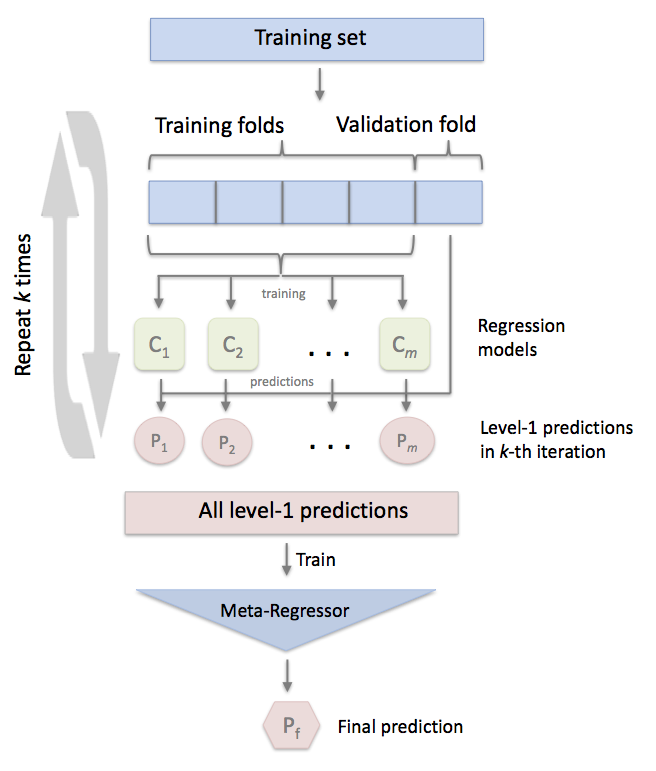


In our case, we will evaluate our prediction models on the housing dataset and see how the R2 and MSE scores are affected by combining the models with StackingCVRegressor. The code output below demonstrates that the stacked model performs the best on this dataset -- slightly better than the best single regression model.

In [529]:
# STACKING REGRESSOR
stack_reg = StackingCVRegressor(regressors=(elasticnet, svr, gbr),
                                meta_regressor=svr,
                                use_features_in_secondary=True)


In [530]:
print('5-fold cross validation scores:\n')

for label in ['elasticnet', 'svr', 'gbr']:
    
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores[label][0], scores[label][1], label))

5-fold cross validation scores:

R^2 Score: 0.11 (+/- 0.02) [elasticnet]
R^2 Score: 0.11 (+/- 0.02) [svr]
R^2 Score: 0.11 (+/- 0.02) [gbr]


In [531]:
# Fitting Models on train set

# Elastic Net
elasticnet_final=elasticnet.fit(X,y)

In [532]:
# SVR
svr_final=svr.fit(X,y)

In [533]:
# Gradient Boositng
gbr_final=gbr.fit(X,y)

In [534]:
# Final Stacking Regressor
stack_reg_final=stack_reg.fit(X,y)

In [535]:
# Once the model is trained, it’s ready to make predictions. 
# We can use the predict method on the model and pass X as a parameter to get the output.
# Notice that the prediction output is an array of real numbers corresponding to the input array.

svr_final.predict(X)

array([11.75160098, 11.94971644, 12.24631457, ..., 11.5611937 ,
       12.43105926, 11.84394977])

In [536]:
gbr_final.predict(X)

array([11.77027331, 11.9929795 , 12.14778231, ..., 11.49087119,
       12.41638453, 11.82699276])

In [537]:
elasticnet_final.predict(X)

array([11.7658899 , 11.99495344, 12.20252022, ..., 11.5911564 ,
       12.44406017, 11.79274273])

In [538]:
stack_reg_final.predict(X)

array([11.75606654, 11.95849993, 12.23183559, ..., 11.52842646,
       12.42419977, 11.84802621])

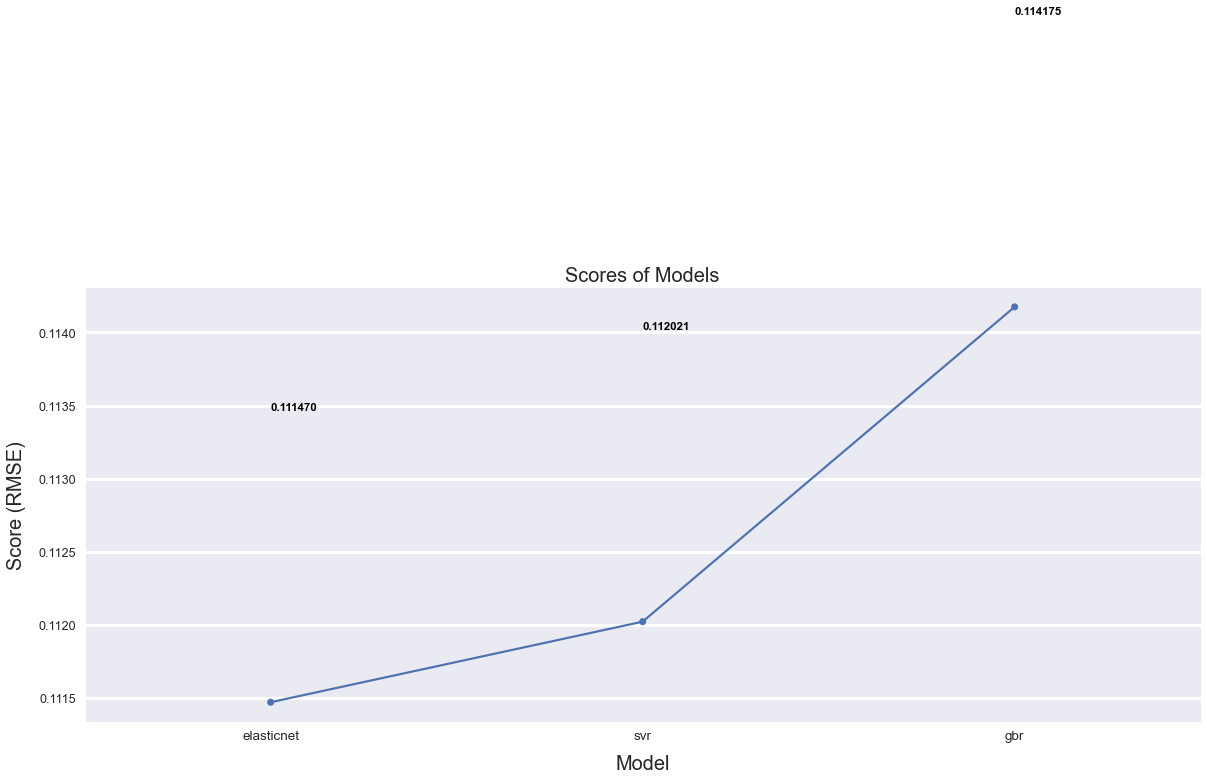

In [539]:
# Plot the predictions for each model

fig = plt.figure(figsize=(20, 8))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

From the above comparison of models we can clearly see that GBR has a slight edge over Elasticnet and SVR for prediction accuracy of our data, Hence I will go with GBR for my prediction.

GBM is a boosting method, which builds on weak classifiers. The idea is to add a classifier at a time, so that the next classifier is trained to improve the already trained ensemble. Each iteration the classifier is trained independently from the rest.


In [555]:
print('Prediction_Submission')
submission = submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(gbr_final.predict(submit_Test)))

Prediction_Submission


ValueError: cannot set using a multi-index selection indexer with a different length than the value

In [543]:
submission.shape

(1459, 2)

In [544]:
X.shape

(1156, 361)

In [545]:
Z_test.shape

(292, 361)

In [ ]:
final_df = test_data
final_df = pd.DataFrame(final_df,columns=['Real_price'])
final_df['predicted_prices'] = gbr_final.predict(test_data)
final_df['difference'] = abs(final_df['Real_price'] - final_df['predicted_prices']).astype(int)
final_df.head(20)

In [561]:
data = gbr_final.predict(Z_test)
np.exp(data)

array([342157.32797475, 189174.86874964, 135702.7478993 , 118448.57034481,
       295776.68067324,  74400.58036806, 147157.03692451, 134019.34882803,
       170018.39011302, 117133.08188493, 195259.0862476 , 118334.57862666,
       191545.03350061, 158570.14362637, 224038.24293572,  94799.74615416,
       370312.35762964, 226977.15655048, 161780.2112681 , 118911.09008466,
       151785.66504614, 166337.88755136, 144277.29862309, 197606.14558795,
       319522.48306298, 148659.75626205, 179203.89259841,  99106.03906612,
       224679.8602793 , 209537.37500687, 189549.51651335, 236810.70025883,
       133686.65254649, 206635.56589872, 168807.07263438, 366216.64616614,
       200883.26492764, 138764.06192869, 187120.80161883, 196346.96639437,
       184478.63510492, 150162.92426886, 118624.78318678, 362241.49325278,
       198277.66234562, 229524.12416817, 123158.29994176, 207072.40952439,
       220034.86677799, 112638.60399538, 212484.75808791, 243749.42096639,
       118944.8173741 , 2

In [546]:
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [554]:
Z_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,age,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,has_pool,has_2ndfloor,has_garage,has_bsmt,has_fireplace,has_openporch,has_wooddeck,has_enclosedporch,has_3ssnporch,has_screenporch,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,LowQualFinSF_log,GrLivArea_log,BsmtFullBath_log,BsmtHalfBath_log,FullBath_log,HalfBath_log,BedroomAbvGr_log,KitchenAbvGr_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log,YearRemodAdd_log,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_G

In [551]:
data = gbr_final.predict(X)
data.shape

(1156,)

In [556]:
q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)

q1

140368.89547373756

In [557]:
q2

235212.84600821807

In [558]:
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

In [559]:
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659
